# Setup

In [290]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import glob
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [291]:
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob

# StarSpace tsv

In [292]:
word_space_df = pd.read_csv('words_space_2.tsv', sep='\t', header=None)

In [293]:
word_space_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,__word__price,-0.000046,0.000020,0.000053,-0.000038,-0.000060,0.000009,-0.000039,-0.000006,-0.000042,...,-0.000032,0.000031,-0.000051,-0.000014,2.554380e-05,-0.000034,0.000008,-0.000007,-0.000019,-0.000015
1,__word__go,-0.000098,-0.000015,0.000066,0.000041,-0.000055,0.000055,0.000078,-0.000014,-0.000161,...,-0.000026,0.000228,0.000019,0.000073,6.676970e-05,-0.000016,-0.000054,0.000022,-0.000055,0.000180
2,__word__people,-0.000078,-0.000160,-0.000108,0.000205,-0.000097,0.000110,-0.000079,0.000257,-0.000029,...,0.000118,0.000014,-0.000033,-0.000053,1.014200e-04,-0.000182,0.000055,-0.000004,-0.000053,-0.000093
3,__word__time,-0.000076,-0.000088,0.000041,-0.000022,-0.000075,0.000010,0.000002,-0.000112,-0.000116,...,0.000092,0.000067,0.000062,0.000012,8.405510e-07,-0.000105,-0.000095,-0.000094,-0.000013,-0.000118
4,__word__rise,0.000054,-0.000025,0.000090,-0.000016,-0.000094,0.000046,-0.000133,0.000009,0.000040,...,-0.000098,-0.000082,-0.000100,-0.000076,1.344670e-04,-0.000068,0.000138,-0.000014,0.000037,-0.000115


In [294]:
embedding_matrix = word_space_df.iloc[:,1:].values*100
# np.savetxt('embedding_matrix_2.txt', embedding_matrix)

In [295]:
b = np.loadtxt('embedding_matrix_2.txt', dtype=float)
embedding_matrix == b

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [296]:
embedding_matrix

array([[-0.00456174,  0.00199049,  0.00530094, ..., -0.000747  ,
        -0.00185691, -0.00148372],
       [-0.0098209 , -0.0015483 ,  0.00657379, ...,  0.00215319,
        -0.0055143 ,  0.017991  ],
       [-0.00775015, -0.0160362 , -0.0108018 , ..., -0.00035693,
        -0.00529569, -0.00925997],
       ...,
       [ 0.315015  ,  0.189739  , -0.0696987 , ...,  0.0138445 ,
        -0.295265  , -0.203578  ],
       [ 0.149428  ,  0.208481  , -0.17191   , ..., -0.0259275 ,
        -0.155085  , -0.10129   ],
       [-0.0167871 , -0.0298068 , -0.0422543 , ...,  0.142328  ,
         0.144241  ,  0.294094  ]])

In [297]:
len(embedding_matrix), len(embedding_matrix[0])

(74518, 100)

# Read Data

In [298]:
df = pd.read_csv('all_data_5_mins_pos_pol.csv', parse_dates=(['timestamp'])).set_index('timestamp')

In [299]:
# df = pd.read_csv('final_ready_all_data_word_to_vec_2.csv', parse_dates = (['timestamp'])).set_index('timestamp')
df.sort_index(inplace = True)

In [300]:
df = df.dropna()

In [301]:
# import ast

# fin = []
# for x in df.cleaned_message.values:
#     b =[]
#     for elem in x.split(';'):
#         if len(elem)>0:
#             b.extend(ast.literal_eval(elem))
#     fin.append(b)

In [302]:
# fin_fin = [' '.join(i) for i in fin]

In [303]:
# len(fin_fin), len(df)

In [304]:
# df['messages'] = fin_fin

In [305]:
# df['polarity_2'] = 0.
# df['subjectivity_2'] = 0.

In [306]:
# for i, row in df.iterrows():
#     blob = TextBlob(str(row.messages))
#     sentiment = blob.sentiment
#     df.set_value(i,'polarity_2', float(sentiment.polarity))
#     df.set_value(i,'subjectivity_2', float(sentiment.subjectivity))

In [307]:
# gg = [TextBlob(row).sentiment   for row in (df.messages.values)]

In [308]:
# df.to_csv('all_data_5_mins_pos_pol.csv')

In [309]:
word_to_vec_data = df['word_to_vec_id'].values
# price_label = df['price_change'].values
price_label= df['close'].values

In [310]:
word_to_vec_data

array(['[9, 785, 56, 7, 1197]', '[21275, 3616, 1197, 2383, 13, 195]',
       '[1218, 64, 648, 758]', ...,
       '[880, 2248, 54, 15, 14, 1, 11, 310, 8, 179, 781, 222, 399, 0, 237, 0, 122, 366, 781, 1, 8, 365, 191, 592, 94]',
       '[308, 3210, 4, 474, 420, 809, 580, 1417, 0, 884, 31, 0, 4, 698, 22, 78, 63, 430, 10, 63, 110, 0, 549, 195, 273, 11, 572, 11, 2885, 358, 76, 1427, 97, 4, 0, 599, 81, 7, 1335, 4, 284, 11, 26, 2, 398, 500, 35, 1, 34, 39, 131, 84, 525, 9, 16219, 30, 35, 29, 84, 71, 454, 16, 118, 0]',
       '[398, 64, 0, 269, 7, 106, 189, 0, 50, 7, 43, 31, 11, 276, 2997, 1, 6, 7, 17, 0, 1, 21, 70]'],
      dtype=object)

In [311]:
import json
word_to_vec_data = [json.loads(elem) for elem in word_to_vec_data]

In [312]:
# price_label = price_label*1000

In [313]:
from sklearn import preprocessing

In [314]:
price_label

array([ 430.61,  430.66,  430.29, ..., 9622.8 , 9621.19, 9617.42])

In [315]:
price_label.reshape(-1, 1)

array([[ 430.61],
       [ 430.66],
       [ 430.29],
       ...,
       [9622.8 ],
       [9621.19],
       [9617.42]])

In [316]:
min_max_scaler = preprocessing.MinMaxScaler()
price_label = min_max_scaler.fit_transform(price_label.reshape(-1, 1))
np.concatenate( price_label, axis=0 )
 

array([0.00399041, 0.00399297, 0.00397403, ..., 0.47443568, 0.47435328,
       0.47416033])

In [317]:
# price_label = [-1 if elem <= -1 else elem for elem in price_label ]
# price_label = [1 if elem >= 1 else elem for elem in price_label ]

(array([67321., 19935., 11616., 12053., 13004.,  7907.,  2682.,  3960.,
         2740.,   763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

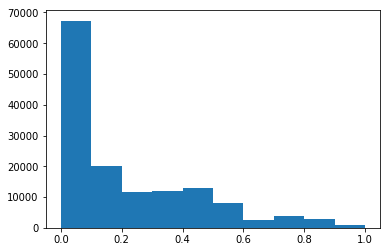

In [318]:
plt.hist(price_label)

In [319]:
# pp = np.log(df['close'].values)
# pp -= min(pp)
# pp /= max(pp)
 
# price_label = pp

# Train/Test

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
emb_len = len( np.loadtxt('embedding_matrix_2.txt', dtype=float))
padded_docs = pad_sequences(word_to_vec_data, maxlen=1500, padding='post', value=emb_len)
print(padded_docs)

[[    9   785    56 ... 74518 74518 74518]
 [21275  3616  1197 ... 74518 74518 74518]
 [ 1218    64   648 ... 74518 74518 74518]
 ...
 [  880  2248    54 ... 74518 74518 74518]
 [  308  3210     4 ... 74518 74518 74518]
 [  398    64     0 ... 74518 74518 74518]]


In [322]:
# divide to train test validation sets (80% 10% 10%)

s = [t.value // 10 ** 9 for t in df.index]
df['unix'] = s
# additional_data = df[['polarity', 'subjectivity', 'unix', 'topic_id']].values

additional_data = df[['polarity_2', 'subjectivity_2', 'volume']].values
# additional_data = df[['polarity', 'subjectivity']].values
X_train, X_test, y_train, y_test, additional_train, additional_test = train_test_split(padded_docs, price_label, additional_data, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val, additional_train, additional_val = train_test_split(X_train, y_train, additional_train, test_size=0.1, random_state=1)

In [323]:
ll = [len(elem) for elem in padded_docs]

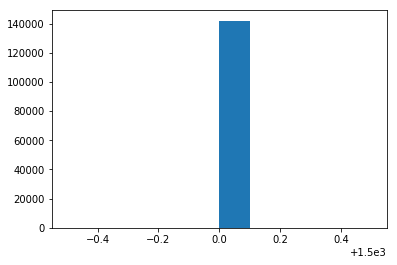

In [324]:
plt.hist(ll)
plt.show()

# Dictionary

In [325]:
word_space_df[0] = [ww[8:] if type(ww) != float else str(ww) for ww in word_space_df[0] ]

In [326]:
words_dict = word_space_df[0].to_dict()

In [327]:
words_dict = dict(zip(words_dict.values(), words_dict.keys()))

In [328]:
# import json 
# with open('word_dict.json', 'w') as outfile:
#     json.dump(words_dict, outfile)

In [329]:
with open('word_dict_2.json') as json_data:
    words_dict_test = json.load(json_data)

----------

# Neural Network LSTM

In [330]:
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout, TimeDistributed, Reshape, Lambda
from keras.layers import LSTM

In [331]:
embedding_matrix = np.loadtxt('embedding_matrix_2.txt', dtype=float)

In [332]:
zero_padding_embedding = (np.zeros(len(embedding_matrix[0]), dtype=float))
embedding_matrix = np.row_stack([embedding_matrix, zero_padding_embedding])

In [333]:
hidden_size = 8 #25
use_dropout=True

-----------

In [334]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model

In [335]:
main_input = Input(shape=(1500,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense len(embedding_matrix[0])-dimensional vectors.
x = Embedding(output_dim = len(embedding_matrix[0]), input_dim = len(embedding_matrix),
                    weights=[embedding_matrix], input_length = 150, trainable=False)(main_input)
# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(units = 32)(x)

# model.add(Dense(1, activation='sigmoid'))
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)


In [336]:
auxiliary_input = Input(shape=(3,), name='aux_input')
x = concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top

x = Dense(35, activation='sigmoid')(x)
x = Dense(35, activation='sigmoid')(x)
x = Dense(35, activation='sigmoid')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [337]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output])

In [338]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 1500)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 150, 100)     7451900     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 32)           17024       embedding_5[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
concatenat

In [339]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [340]:
np.max(X_train)

74518

In [341]:
len(embedding_matrix)

74519

In [342]:
history = model.fit([np.array(X_train), additional_train], [np.array(y_train)], 
          validation_data =([np.array(X_val), additional_val], y_val),
          epochs=8, batch_size=128, verbose =1)

Train on 115003 samples, validate on 12779 samples
Epoch 1/8
115003/115003 [==============================] - 1159s 10ms/step - loss: 0.0530 - val_loss: 0.0439
Epoch 2/8
115003/115003 [==============================] - 1156s 10ms/step - loss: 0.0449 - val_loss: 0.0438
Epoch 3/8
115003/115003 [==============================] - 1148s 10ms/step - loss: 0.0448 - val_loss: 0.0437
Epoch 4/8
115003/115003 [==============================] - 1906s 17ms/step - loss: 0.0448 - val_loss: 0.0436
Epoch 5/8
115003/115003 [==============================] - 1176s 10ms/step - loss: 0.0448 - val_loss: 0.0441
Epoch 6/8
115003/115003 [==============================] - 1151s 10ms/step - loss: 0.0448 - val_loss: 0.0437
Epoch 7/8
115003/115003 [==============================] - 1153s 10ms/step - loss: 0.0448 - val_loss: 0.0436
Epoch 8/8
115003/115003 [==============================] - 1232s 11ms/step - loss: 0.0448 - val_loss: 0.0436


In [343]:
history

In [344]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


dict_keys(['val_loss', 'loss'])


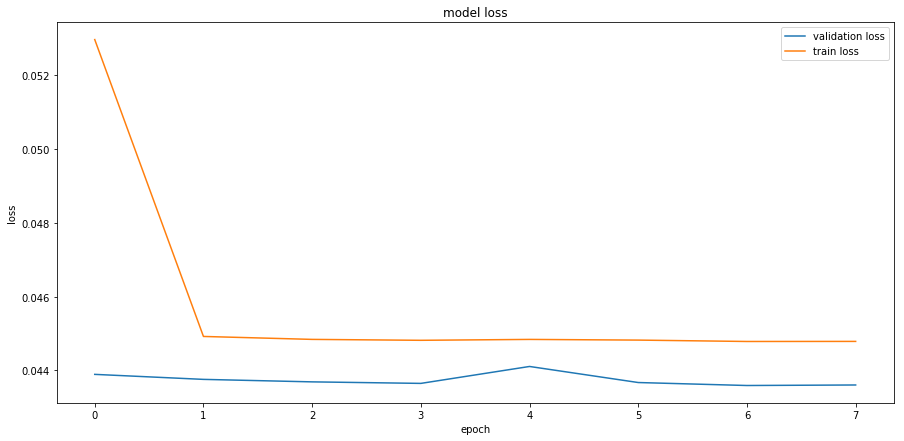

In [345]:
print(history.history.keys())
plt.figure(figsize = (15,7))
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper right')
plt.show()

# Accuracy

In [346]:
from sklearn.metrics import mean_squared_error
pred_y = model.predict( [X_test, additional_test] )
r2 = r2_score( y_test, pred_y )
rmse = mean_squared_error( y_test, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )

KERAS: R2 : 0.172446, RMSE : 0.045777


In [348]:
from sklearn.metrics import mean_squared_error
pred_y = model.predict( [X_train, additional_train] )
r2 = r2_score( y_train, pred_y )
rmse = mean_squared_error( y_train, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )

KERAS: R2 : 0.163444, RMSE : 0.044756


In [349]:
from sklearn.metrics import mean_squared_error
pred_y = model.predict( [X_val, additional_val] )
r2 = r2_score( y_val, pred_y )
rmse = mean_squared_error( y_val, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )

KERAS: R2 : 0.165855, RMSE : 0.043606


----------------

# Predict trend

In [217]:
from sklearn.metrics import mean_squared_error
pred_y = model.predict( [X_test, additional_test] )

In [218]:
trend = [1 if i*j >=0 else 0 for i, j in zip(y_test, pred_y) ]

In [219]:
print('accuracy is: %.3f' % (np.sum(trend)/ len(trend)*100), '%')

accuracy is: 100.000 %


Text(0.5,1,'pred vs real')

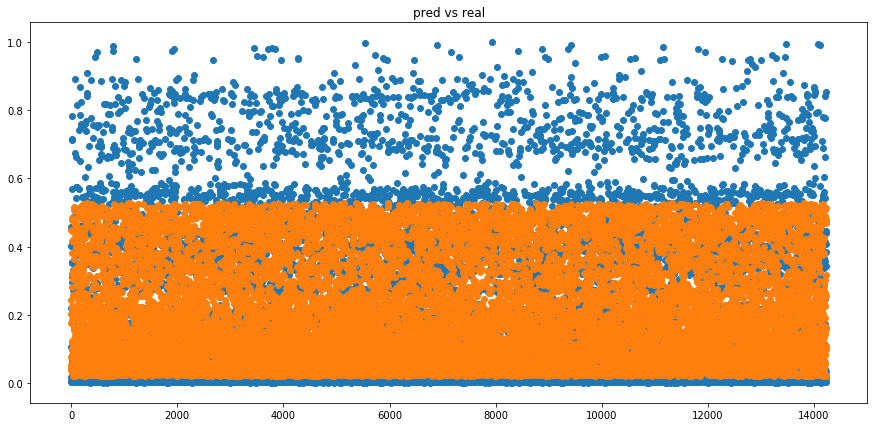

In [220]:
plt.figure(figsize = (15,7))
plt.scatter(y = y_test, x =np.arange(len(y_test)))
plt.scatter(y = pred_y, x =np.arange(len(pred_y)))
plt.title('pred vs real')

Text(0.5,1,'pred vs real')

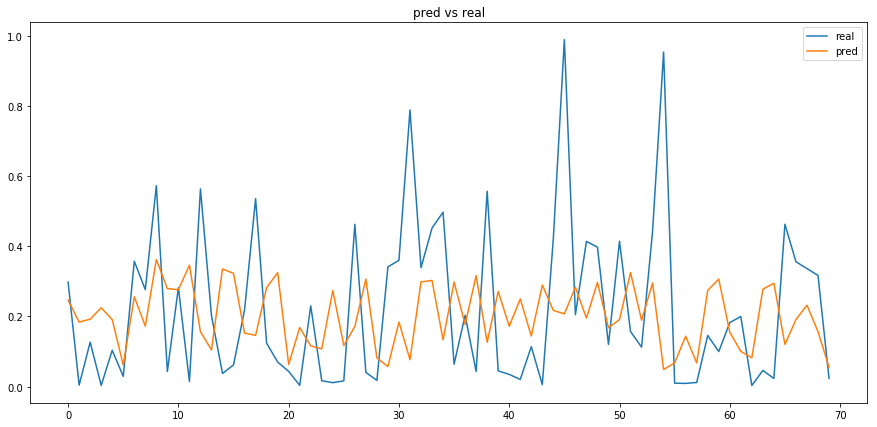

In [362]:
min_v = 1030
max_v = 1100
plt.figure(figsize = (15,7))
plt.plot(y_test[min_v: max_v], label ='real')
plt.plot(pred_y[min_v: max_v], label ='pred')
plt.legend()
plt.title('pred vs real')

Text(0.5,1,'pred')

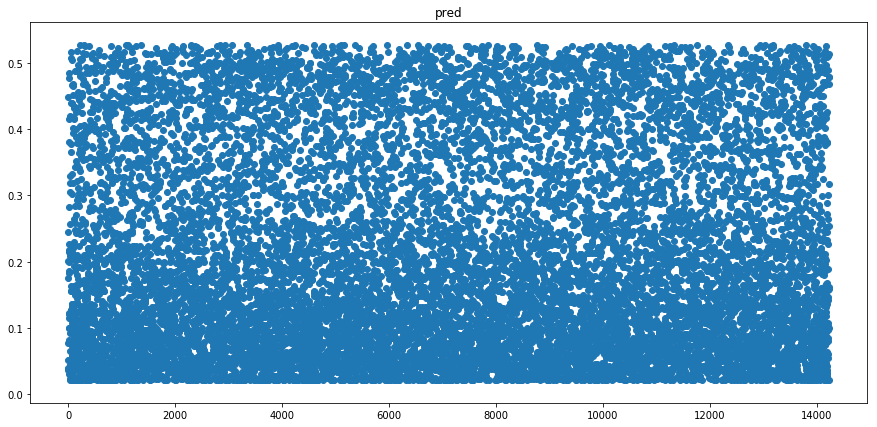

In [221]:
plt.figure(figsize = (15,7))
plt.scatter(y = pred_y, x =np.arange(len(pred_y)))
plt.title('pred')

There isn't any negative values in the prediction

# Save Models

In [350]:
from keras.models import model_from_json

#serialize model to JSON
model_json = model.to_json()
with open("model_1_capstone.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_1_capstone.h5")
print("Saved model to disk")

Saved model to disk


In [352]:
from keras.models import model_from_json 
# load json and create model
json_file = open('model_1_capstone.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_1_capstone.h5")
print("Loaded model from disk")


Loaded model from disk


In [353]:
from sklearn.metrics import mean_squared_error
pred_y = loaded_model.predict( [X_val, additional_val] )
r2 = r2_score( y_val, pred_y )
rmse = mean_squared_error( y_val, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )

KERAS: R2 : 0.165855, RMSE : 0.043606


---------------